# Time Series Analysis in Python


A time series is a series of data points recorded at different time intervals. The time series analysis means analyzing the time series data using various statistical tools and techniques. In this project, I analyze the time series dataset – **Parking Birmingham** downloaded from the UCI machine learning repository.

## Table of Contents


The table of contents of this project are as follows:-



1. Introduction to time series

2. Types of data

3. Time series terminology

4. Import Python packages

5. Import dataset

6. Dataset description

7. Exploratory data analysis

8. Indexing with time series data

9. Resampling the time series data

10. Handling missing values in time series data

11. Visualizing the time series data

12. Seasonal decomposition with time series data

13. The ARIMA Time Series Model

14. Parameter Selection for the ARIMA Time Series Model

15. Fitting an ARIMA Time Series Model

16. Producing and Visualizing the Forecasts

17. Conclusion



## 1. Introduction to time series



A **time series** data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals.  The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.


A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.


Applications of time series are used in statistics, finance or business applications. A very common example of time series data is the daily closing value of the stock index like NASDAQ or Dow Jones. Other common applications of time series are sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition and earthquake prediction.
In this project, I conduct time series analysis of the **Parking Birmingham** dataset downloaded from the UCI machine learning repository.


Before that, we should know about types of data and time series terminology.


## 2. Types of data


As stated above, the time series analysis is the statistical analysis of the time series data. A time series data means that data is recorded at different time periods or intervals. The time series data may be of three types:-



1. **Time series data** - The observations of the values of a variable recorded at different points in time is called time series data. 



2. **Cross sectional data** - It is the data of one or more variables recorded at the same point in time.



3. **Pooled data**- It is the combination of time series data and cross sectional data.


## 3. Time series terminology

There are various terms and concepts in time series that we should know. These are as follows:-

1.	**Dependence**- It refers to the association of two observations of the same variable at prior time periods.


2.	**Stationarity**- It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.


3.	**Differencing**- Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.


4.	**Specification** - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models. 


5.	**Exponential Smoothing** - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value.  It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other.  The exponential smoothing method is used to predict the short term prediction.



6.	**Curve fitting** - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.



7.	**ARIMA** - ARIMA stands for Auto Regressive Integrated Moving Average.


## 4. Import Python packages


To do the time series analysis, we will require Python packages - numpy, pandas, matplotlib and seaborn. So, I will import these packages with their usual alias. 


If you want the images to be plotted in the Jupyter Notebook itself, we should add the IPython magic command %matplotlib inline to our code. 


Also, I will use the Seaborn default plotting characteristics with sns.set().


So, the code look as follows:-

In [1]:
# import python packages

import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
sns.set()



## 5. Import dataset


Now, I will import the dataset to be used in this project. I will import the required dataset with the pandas read_csv() function. 

In [2]:
# import dataset

data = 'C:/datasets/dataset.csv'

df = pd.read_csv(data)


## 6. Dataset description



I have used the `Parking Birmingham Data Set` for this project. The data set is about the car parking in Birmingham city in UK.
The data shows the occupancy rates (8:00 to 16:30) of the cars from 2016/10/04 to 2016/12/19. The data set contains 35717 number of instances and 4 attributes. 


I have downloaded this data set from the UCI Machine Learning repository. It can be found at the following url:-



https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham




## 7. Exploratory data analysis


Now, I will do exploratory data analysis.

First of all, I will check the shape of the dataframe with **shape()** method.

In [3]:
# view the shape of the dataframe

df.shape

(35717, 4)

We can see that there are 35717 rows and 4 columns in the dataset.

Next, I will view the first five rows of dataset with the **head()** method as follows:-

In [4]:
# view the first five rows of dataset

df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


We can see that the `LastUpdated` column contains date and time combined into a single timestamp column. We have to split it into two separate columns.

Now, I will use the **info()** method to view the concise summary of the dataframe.

In [5]:
# view summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
SystemCodeNumber    35717 non-null object
Capacity            35717 non-null int64
Occupancy           35717 non-null int64
LastUpdated         35717 non-null object
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


We can see that the `LastUpdated` column is of object data type. We need to convert it into datatime format. We can use the 
pandas **to_datetime()** method. It will give us two columns `Date` and `Time` with splitted dates.

In [6]:
# convert the lastUpdated column into datetime format

df['LastUpdated'] = pd.to_datetime(df['LastUpdated']) 

In [7]:
# again view the summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35717 entries, 0 to 35716
Data columns (total 4 columns):
SystemCodeNumber    35717 non-null object
Capacity            35717 non-null int64
Occupancy           35717 non-null int64
LastUpdated         35717 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.1+ MB


Now, we can see that the `LastUpdated` column is of `datetime` data type. I will split this `LastUpdated` column into two
separate columns of `Date` and `Time`.

In [8]:
df['Date'] = df['LastUpdated'].dt.date

df['Time'] = df['LastUpdated'].dt.time


I will confirm that the `LastUpdated` column is now split into two separate columns by viewing the first ten rows of dataset.

In [9]:
# again view the first ten rows of dataset

df.head(10)

,SystemCodeNumber,Capacity,Occupancy,LastUpdated,Date,Time
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42,2016-10-04,07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42,2016-10-04,08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42,2016-10-04,08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46,2016-10-04,09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48,2016-10-04,09:59:48
5,BHMBCCMKT01,577,177,2016-10-04 10:26:49,2016-10-04,10:26:49
6,BHMBCCMKT01,577,219,2016-10-04 10:59:48,2016-10-04,10:59:48
7,BHMBCCMKT01,577,247,2016-10-04 11:25:47,2016-10-04,11:25:47
8,BHMBCCMKT01,577,259,2016-10-04 11:59:44,2016-10-04,11:59:44
9,BHMBCCMKT01,577,266,2016-10-04 12:29:45,2016-10-04,12:29:45


Now, I will remove redundant columns from the timeseries dataset.

In [10]:
# remove redundant columns

cols = ['SystemCodeNumber', 'Capacity', 'LastUpdated']

df.drop(cols, axis=1, inplace=True)

Now, I will check the data types of the columns.

In [11]:
# check the data types of the columns

df.dtypes

Occupancy     int64
Date         object
Time         object
dtype: object

We can see that the `Date` column is of `object` data type. It should be of `datetime` format. I will convert the data type of
`Date` column from `object` data type to `datetime` format. Pandas `to_datetime()` method enable us to convert object data type into Python `datetime` format.

In [12]:
# convert the data type of Date column

df['Date']=pd.to_datetime(df['Date'])

In [13]:
# again check the data type of df dataframe

df.dtypes

Occupancy             int64
Date         datetime64[ns]
Time                 object
dtype: object

Now, we can see that the data type of `Date` column is `datetime`.

## 8. Indexing with time series data


When working with time-series data in Python we should always set dates as the index. So, I will set `Date` column as the index of the dataframe.

In [14]:
# set the index of the dataframe

df.set_index('Date', inplace=True)

df.index

DatetimeIndex(['2016-10-04', '2016-10-04', '2016-10-04', '2016-10-04',
               '2016-10-04', '2016-10-04', '2016-10-04', '2016-10-04',
               '2016-10-04', '2016-10-04',
               ...
               '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19',
               '2016-12-19', '2016-12-19', '2016-12-19', '2016-12-19',
               '2016-12-19', '2016-12-19'],
              dtype='datetime64[ns]', name='Date', length=35717, freq=None)

The `dtype=datetime[ns]` field confirms that the index is made up of `datestamp` object. The `length=35717` suggests that we have 35717 datestamps. But, the `freq=None` parameter suggests that the frequency for the datestamps is not specified.


## 9. Resampling the time series data


When we take a closer look at the timeseries data, we can see that there are different observation points at different times in a single day. This type of data can be difficult to work with. So, I transform this dataset into a more meaningful one. 


I will use the pandas dataframe `resample()` function which is primarily used for time series data. It allows us to group the time-series into buckets (1day or 1 month), apply a function on each group (mean) and produce the resampled data.

In [15]:
y=df['Occupancy'].resample('D').mean()

y.head(10)


Date
2016-10-04    655.543651
2016-10-05    655.185185
2016-10-06    636.942130
2016-10-07    576.282407
2016-10-08    428.036232
2016-10-09    283.159091
2016-10-10    582.358796
2016-10-11    646.402778
2016-10-12    671.660714
2016-10-13    674.172619
Freq: D, Name: Occupancy, dtype: float64

Here, the term `D` means that we group the data in buckets by each day and compute the daily mean. 

## 10. Handling missing values in time series data


Now, I will check for missing values in the time series data. The following command will help me to do that.

In [16]:
y.isnull().sum()

4

The above command shows that there are 4 days with missing values in the time series.

I will fill in the missing values using the pandas `fillna()` command. I will use the `method=bfill` argument to fill in the 
missing values. It will fill in the missing values with the values in the forward index.

In [17]:
y.fillna(method='bfill', inplace=True)

Now, I will again check for missing values in the time series.

In [18]:
y.isnull().sum()

0

The above command shows that there are no missing values in the time series.

## 11. Visualizing the time series data


Visualizing the time series data is an important step in time series analysis. It will help us to visualize several important things as follows:-


-**seasonality** - does the time series data display seasonality or periodic pattern?


-**trend** - does the time series data display a consistent upwards or downwards slope?


-**noise** - are there any outliers or missing values that are not consistent with the time series data?



The visualization helps to answer these questions.


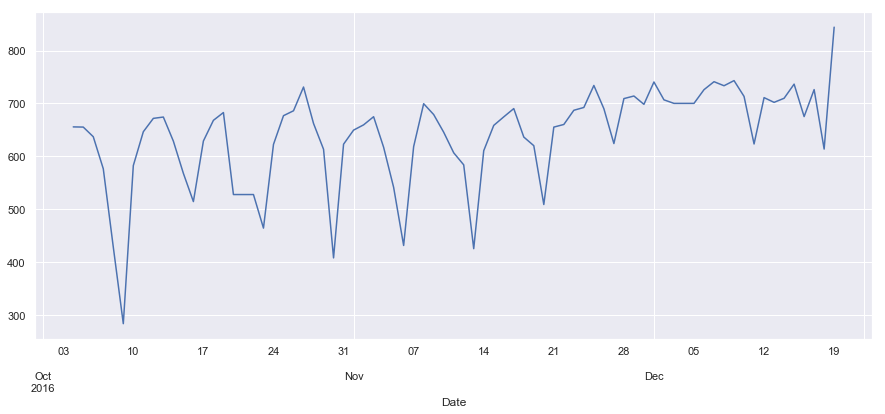

In [19]:
# visualize the time series data

y.plot(figsize=(15, 6))

plt.show()


The above plot reveals some interesting pattern in the time series. It has a seasonality pattern but no increasing or decreasing trend. The pattern reveals that the `Occupancy` has increased in December month. May be it is due to Christmas celebrations in
December.

## 12. Seasonal decomposition with time series data



There is another method to visualize the time series data. This method is called **time-series decomposition**. It allows us to decompose the time series into three distinct components - trend, seasonality and noise.


Python provides a `statsmodels` module which provides tools and techniques for statistical analysis and modeling. This `statsmodels` module provides a `seasonal_decompose` function to perform seasonal decomposition.


Seasonal decomposition returns a figure of relatively small size. So the first two lines of code chunk ensures that the output figure is large enough for us to visualize. We can perform seasonal decomposition in Python with the following lines of code:-

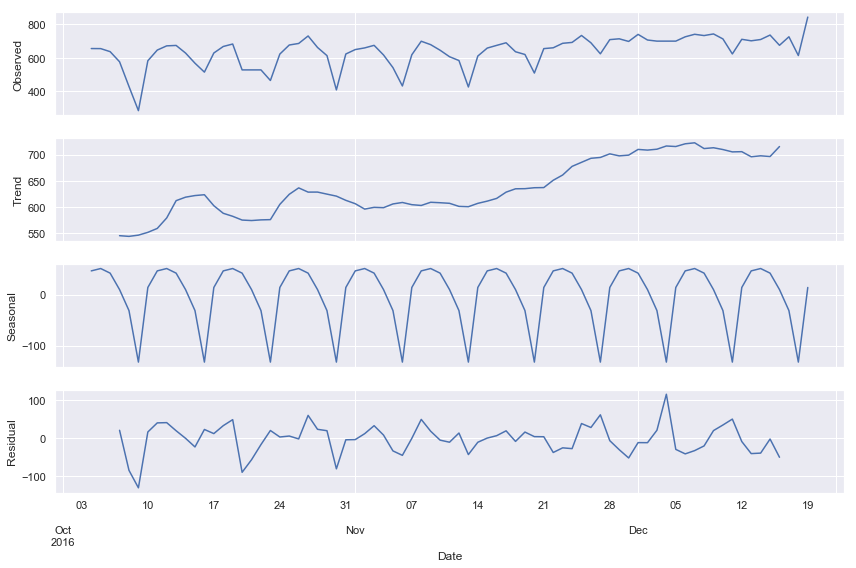

In [20]:
from pylab import rcParams

rcParams['figure.figsize'] = 12, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')

fig = decomposition.plot()

plt.show()

Time series decomposition makes it easy to visualize the data in clear manner. It helps us to identify variation in the time
series. The above plot shows the upwards trend in time series. It can be used to understand the structure of the time series. The time series decomposition is important because many forecasting methods are built upon this concept of structured decomposition to produce forecasts.

## 13. The ARIMA Time Series Model



One of the most common methods used in time series forecasting is known as the **ARIMA model**. ARIMA stands for **AutoRegressive Integrated Moving Average**. It is a generalization of an AutoRegressive Moving Average (ARMA) model. These models are fitted to time series data to better understand the data or to predict future points in the series called **forecasting**. 


The AR part of ARIMA indicates that the evolving variable of interest is regressed on prior values. The MA part indicates that the regression error is actually a linear combination of error terms. The I (for "integrated") indicates that the data values have been replaced with the difference between their values and the previous values (and this differencing process may have been performed more than once). The purpose of these features is to make the model fit the data as well as possible.


There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. So, ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for **seasonality**, **trend** and **noise** in timeseries datasets.



- **p** is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. 



- **d** is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing to apply to the time series. 


- **q** is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.


Non-seasonal ARIMA models are generally denoted by `ARIMA(p,d,q)` where parameters p, d and q are non-negative integers. `p` is the order (number of time lags) of the autoregressive model, `d` is the degree of differencing (the number of times the data have had past values subtracted), and `q` is the order of the moving-average model. 


Seasonal ARIMA models are usually denoted by `ARIMA(p,d,q)(P,D,Q)s`, where `s` refers to the number of periods in each season, and the uppercase P,D,Q refer to the autoregressive, differencing and moving average terms for the seasonal part of the ARIMA model. The term `s` refers to the periodicity of the time series.

## 14.	Parameter Selection for the ARIMA Time Series Model



Now, I will fit the time series data with a seasonal ARIMA model. I have to find the optimal parameter values for our `ARIMA(p,d,q)(P,D,Q)s` time series model. The python code below will help us to find the optimal parameter values for our
model. 


The following code will use a grid search to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal ARIMA model with the `SARIMAX()` function from the statsmodels module and assess its overall quality. The optimal set of parameters will be the one that yields the best performance.


In [21]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)


# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))


# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]


print('Examples of parameter combinations for Seasonal ARIMA are as follows:-')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA are as follows:-
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)


### Grid Search or Hyperparameter Optimization


The above sets of triplets of parameters can now be used to automate the process of training and evaluating ARIMA models on different combinations of parameters. In Statistics and Machine Learning, this process is known as **grid search (or hyperparameter optimization)** for model selection.


The statistical models fitted with different parameters can be ranked and compared against each other based on their `AIC` value. `AIC` which stands for `Akaike Information Criterion` value is conveniently returned with ARIMA models fitted using statsmodels. It measures how well a model fits the data while taking into account the overall complexity of the model. A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest `AIC` value.


The following code snippet iterates through combinations of parameters and uses the `SARIMAX` function from statsmodels to fit the corresponding Seasonal ARIMA model. Here, the order argument specifies the (p, d, q) parameters, while the seasonal_order argument specifies the (P, D, Q, S) seasonal component of the Seasonal ARIMA model. After fitting each SARIMAX()model, the code prints out its respective AIC score.


In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:1201.1161736184724
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:1070.471374772307
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:908.3545887839413
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:803.2581126835703
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:924.6196666957659
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:853.5434245586205
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:814.4338079001363
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:800.081771972065
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:1094.8821436409967
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:976.9639818738005
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:872.886031788871
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:782.6603279215682
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:906.3873337412405
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:833.883948617544
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:814.2499614932638
ARIMA(0, 0, 1)x(1, 1, 1, 4)4 - AIC:782.0113593498435
ARIMA(0, 1, 0)x(0, 0, 0, 4)4 - AIC:888.3346223710352
ARIMA(0, 1, 0)x(0, 0, 1, 4)4 - AIC:835.7013672481089
ARIMA(0, 1, 0)x(0, 1, 0, 4)4 - AIC:900.36199411

The above code output suggests that SARIMAX(1, 1, 1)x(0, 1, 1, 4) provides the lowest AIC value of 767.8663. So, we should  consider this to be the optimal option out of all the models considered.

## 15.Fitting an ARIMA Time Series Model


I have identified the optimal set of parameters that produces the best fit model. Now, I will fit these optimal parameter values
into a new `SARIMAX` model.

In [23]:
model = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2699      0.168      1.603      0.109      -0.060       0.600
ma.L1         -1.0000    231.348     -0.004      0.997    -454.434     452.434
ma.S.L4       -0.9994     27.793     -0.036      0.971     -55.472      53.473
sigma2      4722.2065   1.15e+06      0.004      0.997   -2.25e+06    2.26e+06


The above summary table displays significant amount of information. The coef column shows the weight or importance of each feature and how each one impacts the time series. The P>|z| column shows us the significance of each feature weight.


Now, I will run model diagnostics to detect any unusual behaviour. It is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The `plot_diagnostics` object generates model diagnostics.

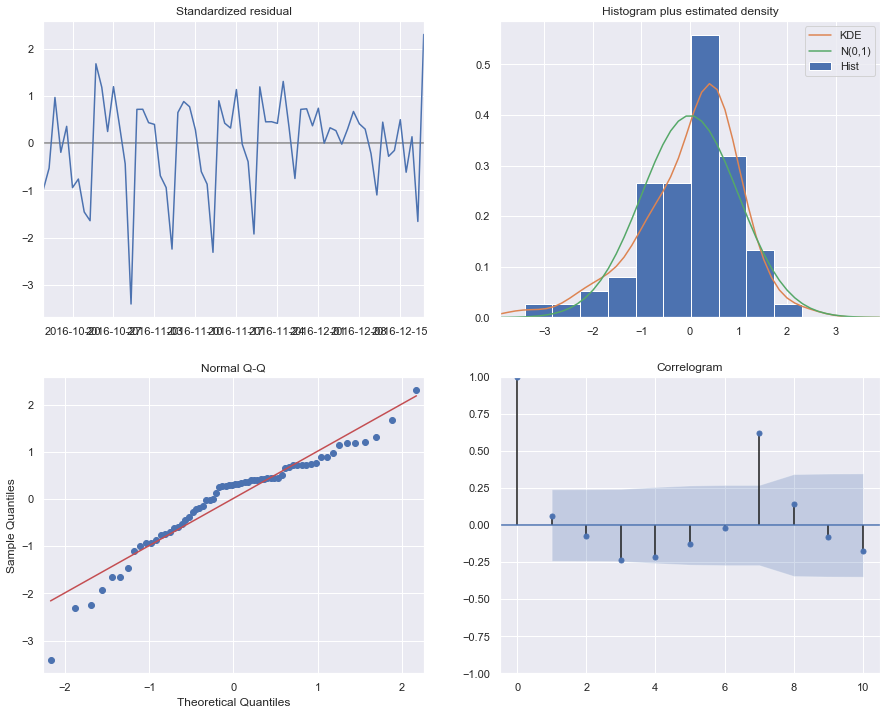

In [24]:
results.plot_diagnostics(figsize=(15, 12))

plt.show()

We should always check that the residuals of the model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, then the model can be further improved.


In this case, the model diagnostics suggests that the model residuals are not normally distributed based on the following observations:-


- In the top right plot, we can see that the red KDE line does not follow with the N(0,1) line. This shows that the residuals are not normally distributed. 


- The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). This is a strong indication that the residuals are not normally distributed.


- The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right. It shows that the time series residuals have low correlation with lagged versions of itself.



So, we can conclude that our model does not produce a satisfactory fit to the time series data. We can change some parameters of our seasonal ARIMA model to improve the model fit. The grid search only considered a restricted set of parameter combinations.
We may find better models if we widened the grid search.


Although, the model does not produce a satisfactory fit to the data, but I will use the same model to illustrate the process of 
validating and producing the forecasts for demonstration purposes.


## 16.	Producing and Visualizing the Forecasts


Now, I will show how to use this time series model to forecast future values. The `get_forecast()` attribute of the time series object can compute forecasted values for a specified number of steps ahead.

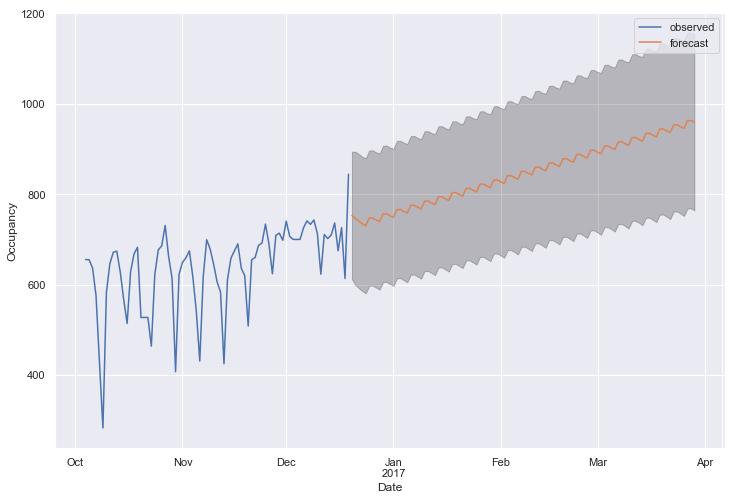

In [25]:
# Get forecast 100 steps ahead in future
pred_uc = results.get_forecast(steps=100)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(12, 8))

pred_uc.predicted_mean.plot(ax=ax, label='forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Occupancy')

plt.legend()
plt.show()

The forecast values and associated confidence intervals can now be used to further understand the time series and understand it. 

## 17.	Conclusion


In this project, I implement a seasonal ARIMA time series model in Python to predict Occupancy rates of car parks in Parking Birmingham Data Set. The forecasts show that the time series model is expected to continue increasing at a steady pace. As we forecast further into the future, we become less confident in our values.